# Bearings dataset EDA

In this note book I investigate dataset charachtristics in the dataset. This is the 2nd step in CRISP-DM, "data understanding" and helps in model selection and analysis

In [76]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [28]:
data01_path = './Datasets/bearings01/NB.csv'
data02_path = './Datasets/bearings01/IR - 7.csv'
data03_path = './Datasets/bearings01/IR - 21.csv'
data04_path = './Datasets/bearings01/OR - 7.csv'
data05_path = './Datasets/bearings01/OR - 21.csv'

While we have different fault classes, I use one-hot-encoding and create column for each class with the same name.

In [30]:
signal_columns = {'DriveEndAcc', 'FanEndAcc'}

normal signal

In [31]:
df_normal = pd.read_csv(data01_path)
df_normal.head()

,DE,FE
0,0.064254,0.038625
1,0.063002,0.096769
2,-0.004381,0.127382
3,-0.035882,0.144640
4,-0.023991,0.086702


In [32]:
df_normal.columns = signal_columns
# since we have two classes we can use 1 for faulti and -1 for normal labels and still prevent ordinal label bias.
# however, one-hot-encoding is also an option which is usually used for more classes
df_normal['fault'] = 0

IR07 fault

In [33]:
df_ir07 = pd.read_csv(data02_path)
df_ir07.columns = signal_columns
df_ir07['fault'] = 1

In [34]:
df_ir21 = pd.read_csv(data03_path)
df_ir21.columns = signal_columns
df_ir21['fault'] = 2

In [35]:
df_or07 = pd.read_csv(data04_path)
df_or07.columns = signal_columns
df_or07['fault'] = 3

In [36]:
df_or21 = pd.read_csv(data03_path)
df_or21.columns = signal_columns
df_or21['fault'] = 4

In [ ]:
dataset = pd.concat([df_normal, df_ir07, df_ir21, df_or07, df_or21], ignore_index=True)

## check stats and nulls

In [43]:
print(dataset.info())
print(dataset.describe())
print(f'num classes: {dataset['fault'].nunique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605775 entries, 0 to 605774
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DriveEndAcc  605775 non-null  float64
 1   FanEndAcc    605775 non-null  float64
 2   fault        605775 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 13.9 MB
None
         DriveEndAcc      FanEndAcc          fault
count  605775.000000  605775.000000  605775.000000
mean        0.005423       0.032709       2.000000
std         0.423496       0.182714       1.414215
min        -3.124034      -0.949405       0.000000
25%        -0.132791      -0.062664       1.000000
50%         0.006676       0.031435       2.000000
75%         0.132791       0.127382       3.000000
max         3.623116       1.049873       4.000000
num classes: 5


In [44]:
print('class specific stats: ')
print(dataset.groupby('fault').agg(['mean', 'std', 'min', 'max']))

class specific stats: 
      DriveEndAcc                               FanEndAcc                      \
             mean       std       min       max      mean       std       min   
fault                                                                           
0        0.011768  0.063400 -0.275998  0.359236  0.032724  0.065195 -0.213056   
1        0.004557  0.299474 -1.425531  1.639620  0.033972  0.232675 -0.895782   
2        0.003434  0.488680 -3.124034  3.623116  0.032252  0.170053 -0.832707   
3        0.003920  0.570418 -3.082207  3.101293  0.032344  0.225159 -0.949405   
4        0.003434  0.488680 -3.124034  3.623116  0.032252  0.170053 -0.832707   

                 
            max  
fault            
0      0.303867  
1      0.957213  
2      1.010836  
3      1.049873  
4      1.010836  


## check duplicates

In [53]:
print('number of duplicates in the dataset: ', sum(dataset.duplicated()))

number of duplicates in the dataset:  10139


In [69]:
dataset[dataset.duplicated(subset=signal_columns)].groupby('fault').count()

,DriveEndAcc,FanEndAcc
fault,,
0,6519,6519
1,429,429
2,1435,1435
3,3225,3225
4,121155,121155


In [64]:
just_duplicates = dataset[dataset.duplicated()]
just_duplicates[just_duplicates.duplicated(subset=signal_columns)].groupby('fault').count()

,DriveEndAcc,FanEndAcc
fault,,
0,327,327
1,2,2
2,7,7
3,13,13
4,1106,1106


In [65]:
just_duplicates.groupby('fault').count()

,DriveEndAcc,FanEndAcc
fault,,
0,6519,6519
1,422,422
2,1106,1106
3,986,986
4,1106,1106


In [68]:
sum(just_duplicates.duplicated())

356

In [73]:
len(df_normal.iloc[:,0])

121155

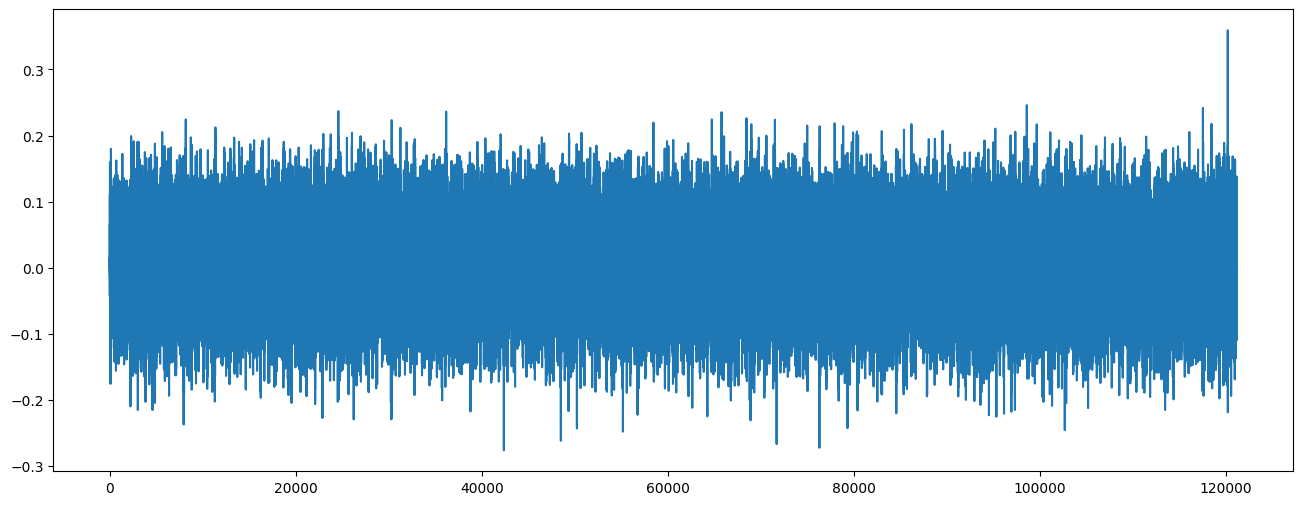

In [80]:
plt.figure(figsize = (16,6))
plt.plot(range(0, len(df_normal.iloc[:,0])), df_normal.iloc[:,0])


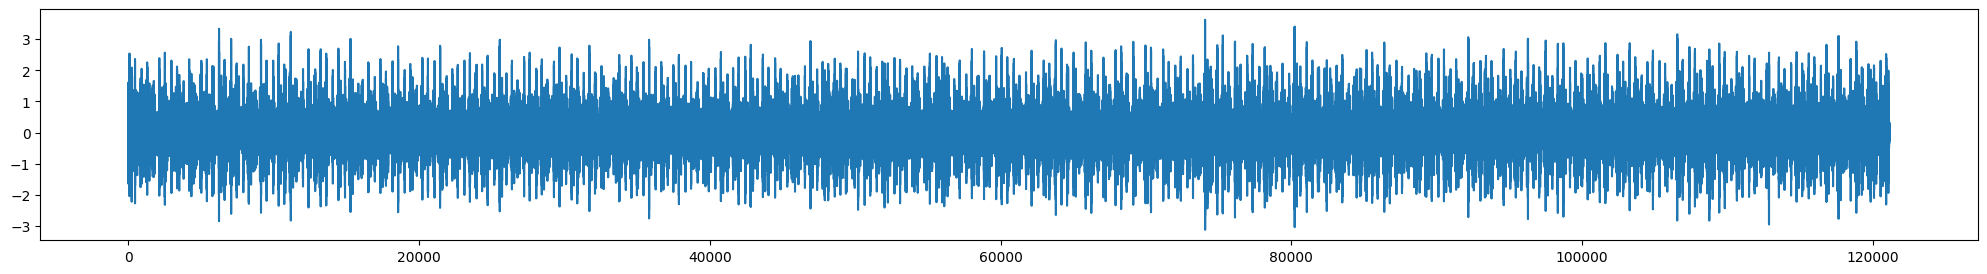

In [83]:
plt.figure(figsize = (25,3))
plt.plot(range(0, len(df_or21.iloc[:,0])), df_or21.iloc[:,0])
